In [55]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

%config InlineBackend.figure_formats = ['jpg']

In [1]:
from game import GameSession
import json
import os

with open("./config/gpt-4o-mini-game-config.json", "r") as file:  # Replace "config.json" with your file path
    config = json.load(file)

def set_secret():

    # Define the file name and the environment variable name
    file_name = "secret.txt"
    env_var_name = "OPENAI_API_KEY"

    # Check if the file exists
    if os.path.isfile(file_name):
        # Open the file and read the first line
        with open(file_name, 'r') as file:
            first_line = file.readline().strip()
            # Set the first line as an environment variable
            os.environ[env_var_name] = first_line
 
set_secret()

for i in range(100):
    print(i)
    game = GameSession(config)
    game.display_player_roles()
    game.initialize_agent_response()

    game.play_rounds()

0
player1 is assigned the role: Werewolf
player2 is assigned the role: Villager
player3 is assigned the role: Prophet
player4 is assigned the role: Villager
player5 is assigned the role: Villager
Verify Initialization: I am ready to play now!
[Status] 4 Villagers alive, Prophet Alive
Round 1: Day Phase - Discussion and Voting
player1: I think we should be cautious about jumping to conclusions too quickly. Player 3 has been unusually quiet; sometimes the ones who don't speak up are trying to avoid drawing attention to themselves. What do you all think about keeping an eye on them?
player2: I agree with player1 that we should be cautious, but I also think player3's quietness is concerning. It might be worth keeping them on our radar as we discuss who to vote for this round.
player3: I understand the concern about quiet players, but let's also consider that some might simply be processing the information. Perhaps we should focus on those who are trying to steer the conversation too aggres

In [4]:
d = './output/global_history'
js = os.listdir(d)

In [ ]:
def find_wolf_pos(d):
    pos = 1
    for p in d:
        if d[p] == 'Werewolf':
            return pos
        pos += 1

winners = []
werewolf_pos = []
# Open the JSON file
for fp in js:
    with open(os.path.join(d, fp), 'r') as file:
        data = json.load(file)

    winners.append(data['winning_team'])
    werewolf_pos.append(find_wolf_pos(data['player_roles']))

winners = np.array(winners)
werewolf_pos = np.array(werewolf_pos)

In [65]:
plt.rcParams.update({'font.size': 14})

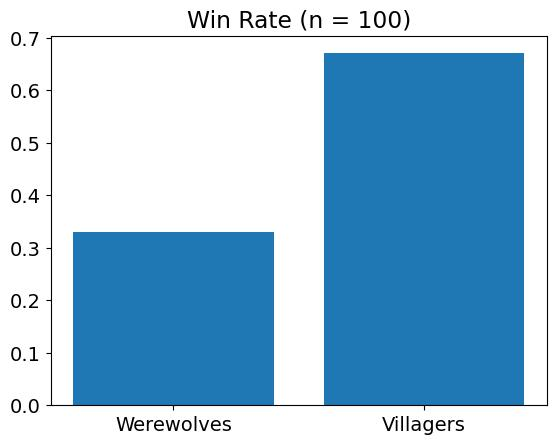

In [66]:
plt.bar(['Werewolves', 'Villagers'], [np.sum(winners == 'Werewolves') / 100, np.sum(winners == 'Villagers')/ 100])
plt.title('Win Rate (n = 100)')
plt.savefig('/Users/so/Documents/winloss.eps', format='eps')

In [39]:
wolf_win_mask = winners == 'Werewolves'

wolf_win_pos = werewolf_pos[wolf_win_mask]
wolf_win_pos_agg = np.bincount(wolf_win_pos)[1:]
wolf_lose_pos = werewolf_pos[~wolf_win_mask]
wolf_lose_pos_agg = np.bincount(wolf_lose_pos)[1:]

Text(0.5, 0, 'Wolf Position')

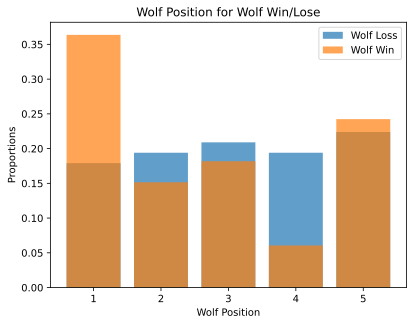

In [49]:
plt.bar([1, 2, 3, 4, 5], wolf_lose_pos_agg / sum(wolf_lose_pos_agg), alpha = 0.7, label = 'Wolf Loss')
plt.bar([1, 2, 3, 4, 5], wolf_win_pos_agg / sum(wolf_win_pos_agg), alpha = 0.7, label = 'Wolf Win')
plt.legend()
plt.title('Wolf Position for Wolf Win/Lose')
plt.ylabel('Proportions')
plt.xlabel('Wolf Position')

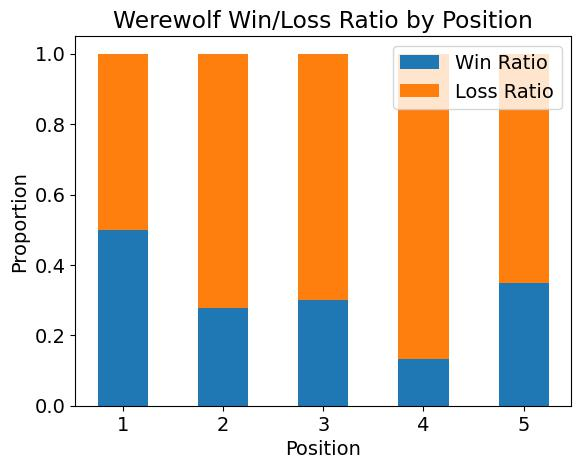

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Assume the data is pre-defined as you described
# For example:
# winners = np.array(["Werewolves", "Villagers", "Werewolves", ...])
# werewolf_pos = np.array([1, 2, 5, 3, 1, 2, 4, 5, 1, ...])

# Step 1: Create win/loss masks and position arrays
wolf_win_mask = winners == 'Werewolves'
wolf_win_pos = werewolf_pos[wolf_win_mask]
wolf_lose_pos = werewolf_pos[~wolf_win_mask]

# Step 2: Count wins and losses for each position
win_counts = np.bincount(wolf_win_pos, minlength=6)[1:]  # Positions 1 to 5
lose_counts = np.bincount(wolf_lose_pos, minlength=6)[1:]

# Step 3: Calculate total games per position and win/loss ratios
total_counts = win_counts + lose_counts
win_ratios = win_counts / total_counts
lose_ratios = lose_counts / total_counts

# Step 4: Plot the histogram
positions = np.arange(1, 6)
bar_width = 0.5

# plt.figure(figsize=(8, 5))
plt.bar(positions, win_ratios, label='Win Ratio', width=bar_width)
plt.bar(positions, lose_ratios, bottom=win_ratios, label='Loss Ratio', width=bar_width)

plt.xlabel("Position")
plt.ylabel("Proportion")
plt.title("Werewolf Win/Loss Ratio by Position")
plt.xticks(positions)
plt.legend()
plt.savefig('/Users/so/Documents/ratio.eps', format='eps')